# Intro to Python Lesson 2: Strings, arrays and lists, control flow

# Strings

Strings are another data type (like numbers) and are simply text. You define strings by enclosing them in quotation marks (either " or ') Their use is fairly intuitive. Most of the time you will be using strings to point to directories and folders. Recall the last session where we used a string to point to particular data files in this repository (repo). 

In [1]:
import pickle
fname = '../Data/fc_velocity.pkl'  #The .. means leave the current folder to go up a level

# I only use the "with" keyword occasionally. The open() function requires that you close whatever you open later, but 
# when you have open() in a "with statement", the file automatically gets closed for you. 
# The 'rb' is just a mode of opening. Here, we are reading (r) a byte (b) file. 
# Refer to the open() documentation if you want to learn more. 
with open(fname, 'rb') as file: # Here, we are opening the file specified in fname and storing the opened file in "file". 
    data = pickle.load(file)    # Then we load and store the data in "data". 
# Exiting the statement closes the file. 

data

array([ 24.18518519,  27.15384615,  29.84615385, ...,  13.88888889,
        13.33333333,  12.77777778])

Another common use for strings is labeling figures. 

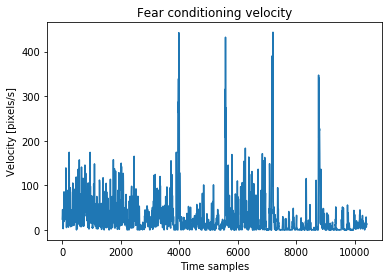

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt    # Standard way to import matplotlib's pyplot. 

plt.plot(data)                     # Recall that plot() is a function in the plt module. 
title_of_my_figure = 'Fear conditioning velocity'           
plt.title(title_of_my_figure)      # Set title. As you can guess, title() is also a function in the plt module. 
plt.xlabel('Time samples')         # Set x-axis label.
plt.ylabel('Velocity [pixels/s]')  # Set y-axis label.
plt.show()                         # Display the plot. 

Other times you can print strings to the console to mark progress. 

In [10]:
progress = 'DeepLabCut step #1 complete. Label body parts now.' # Feel free to change this to display different text. 
print(progress)                                                 # The function print() displays the string. 

DeepLabCut step #1 complete. Label body parts now.


Here are some other tricks with strings. 

In [11]:
# You can combine strings with the + operator. 
first_name = 'Stuart'
last_name = 'Little'

# The middle term here is just a space. 
mouse = first_name + ' ' + last_name
print(mouse)

Stuart Little


In [12]:
# When working with paths, use the os package. 
import os 

repo_folder = '..' # As seen earlier, .. means "the folder containing the folder we are in now"
data_folder = os.path.join(repo_folder, 'Data') # os.path.join() joins folder names to directories. 
data_file = os.path.join(data_folder, 'fc_velocity.pkl') 
print(data_folder) # ../Data
print(data_file)   # ../Data/fc_velocity.pkl

print('') # Just a skips a line in the console.

# This way works too. You can join an infinite number of folders with os.path.join() as far as I know. 
data_file2 = os.path.join(repo_folder, 'Data', 'fc_velocity.pkl')
print(data_file2)  # ../Data/fc_velocity.pkl

..\Data
..\Data\fc_velocity.pkl

..\Data\fc_velocity.pkl


Overall, using strings is pretty intuitive. 

# Lists and numpy arrays

Lists and numpy arrays are extremely useful for organizing neuroscience data; most of my data is stored in lists and numpy arrays. Lists are a native data type to base Python, but numpy arrays originate from the numpy package. Let's import that now.  

In [13]:
import numpy as np # Standard way to import numpy.

Let's go over lists first. For Matlab folks, lists are the Python analog of cell arrays. Lists store multiple values and can be mostly thought of as one-dimensional. By that, I mean that their contents are organized simply by, well, listing values one after another. There are a lot of complicated things you can do with lists, but here, we will keep it simple for now. For more advanced topics, see the challenge section at the end of this notebook.

You can define lists by entering values separated by commas, all enclosed in brackets []. 

In [14]:
num_list = [4, 8, 15, 16, 23, 42] # A list of numbers. Brownie points if you recognize this list. 
str_list = ['Fear conditioning', 'Extinction', 'Reinstatement', 'Recall'] # List of strings. 

print(num_list)
print(str_list)

[4, 8, 15, 16, 23, 42]
['Fear conditioning', 'Extinction', 'Reinstatement', 'Recall']


As you get more familiar with Python, you will notice that some data types have built in functions. These are referred to as "methods". Methods take that instance of the variable as its first parameter. Lists in particular have a useful method called append() that tacks on values to the end of the list. We will be using append() later. 

In [15]:
num_list.append(100) # Place 100 at the end of the list. Every time you run this cell, you will append 100. Try modifying this value.
num_list

[4, 8, 15, 16, 23, 42, 100]

Just so you know, lists can contain mixed data types (e.g., a number and a string), but the utility of this feature is usually not very useful for us. 

In [16]:
mixed_list = ['Hello', 5]
mixed_list

['Hello', 5]

Let's move on to numpy arrays. For Matlab folks, numpy arrays work pretty much the same as Matlab arrays. Basically, arrays store multiple numbers or booleans (covered in the next section). The velocity data we loaded from the pkl file is in an array. 

In [17]:
data # Note the data type of this variable to the left in the output.

array([ 24.18518519,  27.15384615,  29.84615385, ...,  13.88888889,
        13.33333333,  12.77777778])

In [18]:
data.shape # This tells you the shape of the data. There are 37,239 values in this one-dimensional array. 
# .shape is an "attribute" of the variable "data". It is a fixed value that describes the array. 

(10405,)

Especially when working with physiological data, your arrays will tend to have multiple dimensions. Whereas lists are generally thought of as one-dimensional, arrays can have multiple dimensions. 

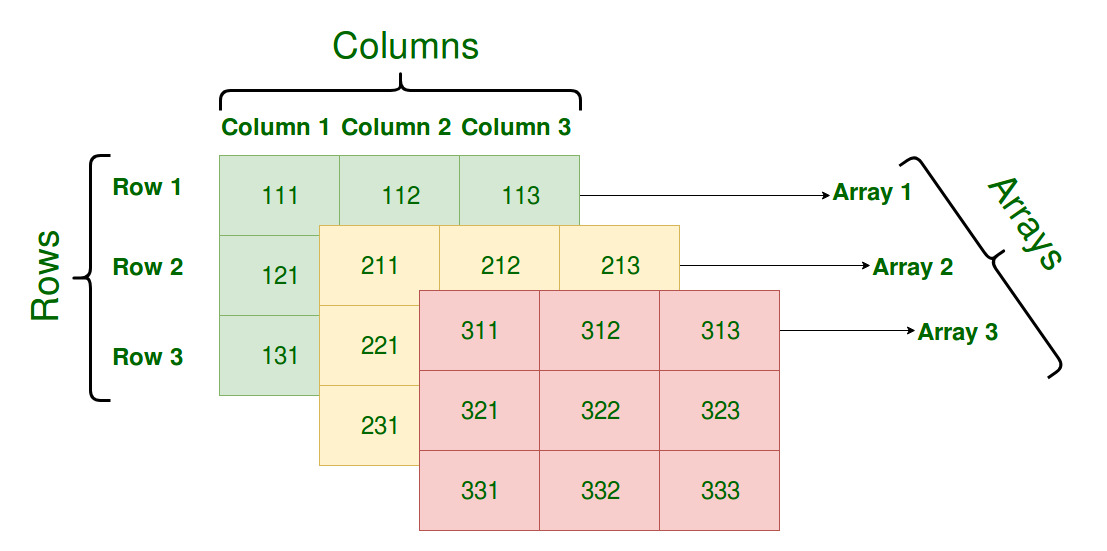

In the image above, the red array is a 2D array that is 3x3 (3 rows and 3 columns). This is useful for storing, say, calcium imaging fluorescence where each row can be a neuron and each column a sample. In such a structure, each value can be considered the fluorescence value of a single neuron at a single time point. 

If we consider the entire image above, this particular array actually has three dimensions (three 3x3 arrays). The third dimension can be used to store similar data from different sessions or animals. Images such as histology z-stacks can be read into Python as 3D arrays (e.g., z by x by y). Similarly, video files can be read into Python as 3D arrays as well such that each frame is a 2D array (e.g., x by y by time). 

In [19]:
red_array = np.asarray([[311, 312, 313], [321, 322, 323], [331, 332, 333]]) # Recreate the red array above. 

whole_array = np.asarray([[[111, 112, 113], [121, 122, 123], [131, 132, 133]], 
                          [[211, 212, 213], [221, 222, 223], [231, 232, 233]],
                          red_array])                                       # Recreate the whole array.

print('Red array:')
print(red_array)
print(red_array.shape) # 3 rows x 3 columns (3,3)
print('')
print('Whole array:')
print(whole_array)
print(whole_array.shape) # 3 arrays with each array being 3 rows x 3 columns (3,3,3)

Red array:
[[311 312 313]
 [321 322 323]
 [331 332 333]]
(3, 3)

Whole array:
[[[111 112 113]
  [121 122 123]
  [131 132 133]]

 [[211 212 213]
  [221 222 223]
  [231 232 233]]

 [[311 312 313]
  [321 322 323]
  [331 332 333]]]
(3, 3, 3)


(858, 800)


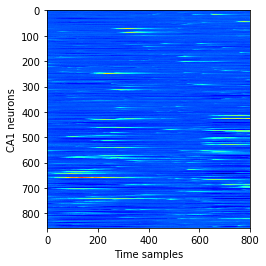

In [29]:
import matplotlib.pyplot as plt

# Here is an example of some calcium imaging data arranged as an array. 
fname = '../Data/traces.pkl'
with open(fname, 'rb') as file:
    traces = pickle.load(file)

print(traces.shape) # 858 neurons x 800 samples

plt.imshow(traces, cmap=plt.get_cmap('jet')) 
plt.xlabel('Time samples')
plt.ylabel('CA1 neurons')
plt.set_cmap('jet')
plt.show()

As long as you have enough RAM, you can have an array of inifinite dimensions, though I rarely find a use for a 4D array and have never made a 5D array. However, this all depends on what you're trying to do, so for example, I expect computational modelers to have different needs.

You may be wondering how to extract certain values from these arrays. The way you do this is via "indexing", which is supremely important in analyzing physiological data (e.g., ephys and calcium imaging). This is probably the skill I use most often when designing any program so we will shelve this concept for now since I will be devoting an entire lesson to it in the future. For the overachievers, indexing in Python is 0-based and uses brackets (versus 1-based and with parentheses in Matlab). Here is a preview below but don't focus on this right now. 

In [ ]:
print('First array:')
print(whole_array[0])

print('Second array:')
print(whole_array[1])

print('Third row of second array:')
print(whole_array[1,2])

print('First column of first array:')
print(whole_array[0,:,0])

print('Second value of third row of third array:')
print(whole_array[2,2,1])

Most of the time, arrays will be real data so you'll be loading them in rather than creating arrays from scratch. But if you ever want to make an array, you can pass a list into the function np.asarray(). 

In [ ]:
my_array = np.asarray([1, 2, 3, 4, 5]) 
my_array

I will use arrays in most situations because arrays take up less memory and are generally faster than lists. However, lists are good for packaging short groups of things together. For example, my scripts that compile data over my entire data set takes a list of animal names. Generally speaking, arrays are better for numeric values (e.g., freezing levels or calcium imaging fluorescence), while lists can store literals (e.g., animal names or cohort data). 

# Boolean logic and "if statements"

A boolean is a data type that is one of two values: True or False. Most of the time, you will be storing this information in a variable. For example, you might want to label data from a particular folder as data from an extinction session.

In [ ]:
extinction_session = True   # Assign the variable. 
extinction_session          # Display the variable. 

Here are some other tricks. 

In [ ]:
not extinction_session # Negation.

In [ ]:
5 < 4 # Comparison operators like > or < test if what you just entered is true or false and outputs the value. 

In [ ]:
2.5 == 1.5 # == is different from =. = assigns a variable. == asks if the two values are the same. 

In [ ]:
# Just as == checks whether the thing on the left is equal to the thing on the right, "in" checks whether the thing 
# on the left is in the thing on the right. 
1 in [1,2,3] 

In [ ]:
4 in [1,2,3]

In [ ]:
# Let's assign a session type to a variable. I will often do this to keep track of which files belong to which session.
session_type = 'Extinction'
print(session_type == 'Extinction')        # The == also works for strings. 
print(session_type == 'Fear conditioning') 

# != means "is not". This line asks: session_type is not "Fear conditioning"? This turns out to be true. 
print(session_type != 'Fear conditioning') 

When you care about multiple conditions, use and/or. For example, this might be useful if you want to batch-analyze your entire
dataset, but want to filter out certain sessions.

In [ ]:
opto_session = False
extinction_session = True

extinction_session or opto_session # True when either condition is True. 

In [ ]:
extinction_session and opto_session # Only true when both conditions are True.

In [ ]:
extinction_session and not opto_session

You can also have a list of booleans. We will build a list of booleans indicating freezing later.

In [ ]:
bool_list = [True, True, False, False, False, True, False]
bool_list

Boolean logic is very important to designing programs. They allow you to gate certain actions and functions conditionally, a concept known as "control flow". Booleans are commonly used in "if statements". Below is a diagram of an if statement. 

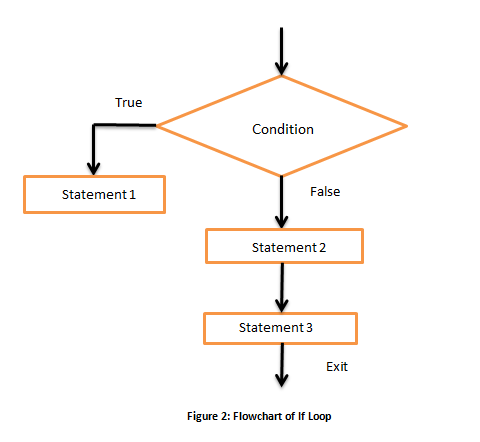

As shown above, you can "branch" a program to do one thing if a condition is satisfied or another thing if not. 

In [ ]:
# This function should be fairly readable. 
# It takes two arguments, a number and a list (or array) and checks whether the number is in the second argument. 
def is_in(x, my_set):
    if x in my_set: 
        print(str(x) + ' is in the set!')
    else: 
        print(str(x) + ' is not in the set!')
        
is_in(3, [1,3])
is_in(2, [1,3])

# "for loops"

For loops are extremely powerful for designing programs on neuroscience data sets. The idea behind a for loop is that you want to perform a particular action for multiple things. Rather than write a line of code for each entry in a list, you can write a single line inside of a for loop and just loop through the list. 

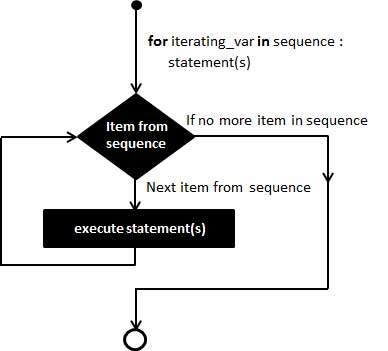

Follow the flow chart above to understand how a for loop works. For each entry in an iterable variable, you can instruct the computer to do some arbitrary thing (recall abstraction!) to the entry. Then it goes to the next entry, where it will do the same arbitrary thing again. It keeps doing this until it reaches the end of the iterable, then it will exit the loop. 

In [ ]:
# Let's build a function that takes a list (or array) and adds 6 to each entry and prints the results.
def add_six(x):
    # For each value in the given input...
    for entry in x: 
    # The "in" here operates slightly differently than the membership "in". Here, "in" works with "for" to extract each value 
    # from x (which should be a list or array). Note that this operates slightly differently than in Matlab. 
    
        # Define new_value, which is the old value plus 6.
        new_value = entry + 6
        
        # Print the new value.
        print(new_value)
        
        # Then do it again and again until the end of x.
        
add_six([1,5,7])

Constructs like these are useful for iteratively analyzing individual z planes or frames in something like a 3D array. Recall that z-stacks and videos can be reconceptualized as 3D arrays. That means you can loop through frames and z planes, searching for cells or mice. 

The Cai lab's EZTrack package uses a for loop to track the mouse every frame on line 239: https://github.com/DeniseCaiLab/ezTrack/blob/master/LocationTracking_Functions.py#L239

I have something similar in my custom software on line 553: https://github.com/wmau/FearReinstatement/blob/master/microscoPy_load/ff_video_fixer.py#L553

This notebook counts cells on a single image, but this can easily be inserted into a loop to analyze z-stacks: 
https://github.com/luispedro/python-image-tutorial/blob/master/Segmenting%20cell%20images%20(fluorescent%20microscopy).ipynb

This code may look unfamiliar, but by now I hope that it's at least not complete gibberish. The packages and functions are different from what we've been working with, but the syntax (i.e., grammar) of the code is the same. 

# Exercise: Loop through the velocity data to threshold freezing

Let's combine all the concepts we've learned so far to build a list of booleans that is True when the mouse is freezing. We're going to take our velocity data from fc_velocity.pkl and loop through it. For each sample, we will determine whether the velocity at that time point is lower than our arbitrary threshold (let's set that to 7 for now). If it's lower than our threshold, we will assign the value True, else False. In the end, you should end up with a function, but you can start with a script if that's easier. You can insert a new cell to do this through the Insert menu at the top of the page. 

In [ ]:
# Define your function. Name it whatever you like. It should take two arguments as input:
# - A string, the file path.
# - A number, the velocity threshold for freezing. 
    # Open the file and store the data in a variable. This is the same as the function from last session, but try not 
    # to look back. 
    
    # This is an empty list. We will append values to this list as we iterate through the velocity data. 
    freezing = []
    
    # Start your for loop here. Reference the entries in the velocity data. 
        # Start your if statement here. Think about what two conditions apply. Don't forget to indent the contents of your loop.
            # Append True to "freezing" if the conditioned is satisfied.
        # The second part of your if statement goes here. 
            # Append False to "freezing" if the condition is not satisfied. 
    
    # Exit the function and store the freezing array. 
    
# This should give me an list of True or False depending on whether the mouse was freezing or not. 
freezing = my_function('../Data/fc_velocity.pkl', 7) # Rename the function to match your function name.

# Challenge 1: List comprehension

List comprehensions are essentially concise for loops that create new lists from existing iterables. They are not super important to learn because you can accomplish the exact same result from a for loop, but they are very useful for making your code more concise. I recommend coming back to this concept when you get more comfortable constructing for loops. The entire portion of your for/if loop can be written in one line as a list comprehension. Here is an example.

In [ ]:
orig_list = [4, 8, 15, 16, 23, 42]
new_list = [x*2 for x in orig_list] # The syntax here is pretty readable IMO, but let me know if this is confusing. 
new_list

Here's a slightly more complex one. 

In [ ]:
orig_list = [4, 8, 15, 16, 23, 42]
new_list = [x if x > 15 else x*2 for x in orig_list]
new_list

Okay with that, you should have enough information to turn your original for/if loop into a list comprehension. Try this below. 

# Challenge 2: Logical array

The function you built is important for teaching how for loops work, but the same thing can be accomplished much more easily using a logical array and it's much shorter. No hints here. Can you figure it out? 

# Challenge 3: Make a plot for each pkl file

Try to build a function that will load data from each pkl file in the Data folder and plot the velocity (with axis labels!) 

Hint 1: https://stackoverflow.com/questions/3964681/find-all-files-in-a-directory-with-extension-txt-in-python. 

Hint 2: To plot multiple figures you will need to explicitly make new figures using plt.figure(). Otherwise, Python will plot new data over an existing figure. 

# Challenge 4: Overlay freezing over velocity

You got an array of freezing booleans from your function, but you want to visualize it on top of the velocity. Maybe you don't quite believe that you accomplished this! (You did). Well now you see for yourself. Write a function that loads the data, plots the velocity, then overlays the freezing boolean array on top of the velocity. You can do this easily with plt.plot() but it will look very messy. A more publication-ready figure can be made using plt.fill_between(): https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.fill_between.html. 